# Sources analysis
Mouna Ammar & Paul Gazel

In this first analysis we are going to inspect the API's sources. Those are the newspapers from which the articles are collected.

These sources are obtained through the API. To facilitate the following study, the JSON result of the query has been saved in txt format (sources.txt).

To study this JSON we decided to directly import it into Pandas without using any database as it seemed a little excessive to do so.

In [22]:
import pandas as pd
import json
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

import pickle

In [56]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.0f}%\n({v:d})'.format(p=pct,v=val) if pct >= 2 else '{v:d}'.format(v=val)
    return my_autopct

We start by loading the JSON into Pandas.

In [3]:
with open ('sources.txt') as f:
    json_sources = json.load(f)

In [4]:
json_sources

{'status': 'ok',
 'sources': [{'id': 'abc-news',
   'name': 'ABC News',
   'description': 'Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com.',
   'url': 'https://abcnews.go.com',
   'category': 'general',
   'language': 'en',
   'country': 'us'},
  {'id': 'abc-news-au',
   'name': 'ABC News (AU)',
   'description': "Australia's most trusted source of local, national and world news. Comprehensive, independent, in-depth analysis, the latest business, sport, weather and more.",
   'url': 'http://www.abc.net.au/news',
   'category': 'general',
   'language': 'en',
   'country': 'au'},
  {'id': 'aftenposten',
   'name': 'Aftenposten',
   'description': 'Norges ledende nettavis med alltid oppdaterte nyheter innenfor innenriks, utenriks, sport og kultur.',
   'url': 'https://www.aftenposten.no',
   'category': 'general',
   'language': 'no',
   'country': 'no'},
  {'id': 'al-jazeera-english',
   'name': 'Al Jazeera English',
   'descr

In [5]:
df = pd.DataFrame(json_sources['sources'])
df.head()

,id,name,description,url,category,language,country
0,abc-news,ABC News,"Your trusted source for breaking news, analysi...",https://abcnews.go.com,general,en,us
1,abc-news-au,ABC News (AU),"Australia's most trusted source of local, nati...",http://www.abc.net.au/news,general,en,au
2,aftenposten,Aftenposten,Norges ledende nettavis med alltid oppdaterte ...,https://www.aftenposten.no,general,no,no
3,al-jazeera-english,Al Jazeera English,"News, analysis from the Middle East and worldw...",http://www.aljazeera.com,general,en,us
4,ansa,ANSA.it,"Agenzia ANSA: ultime notizie, foto, video e ap...",http://www.ansa.it,general,it,it


Now that we have imported the sources into Pandas we can study them. Firstly we can see that only 4 out of the 7 columns could be interesting. The columns "name", "description", "URL" doesn't seem to be of any use as they are unique for each newspaper. The columns "category", "language" and "country" look promising as they show how the sources are distributed around the world and in newspapers speciality.
The column "id" can be useful later on when analysing the articles by "category", "language" or "country".

In [6]:
# Check if there is some null values
df.isnull().sum()

id             0
name           0
description    0
url            0
category       0
language       0
country        0
dtype: int64

In [7]:
# Check data types
df.dtypes

id             object
name           object
description    object
url            object
category       object
language       object
country        object
dtype: object

In [8]:
# Check unique values
print('Category values:', df['category'].unique())
print('Language values: ', df['language'].unique())
print('Country values: ', df['country'].unique())

Category values: ['general' 'business' 'technology' 'sports' 'entertainment' 'health'
 'science']
Language values:  ['en' 'no' 'it' 'ar' 'ud' 'de' 'pt' 'es' 'fr' 'he' 'ru' 'se' 'nl' 'zh']
Country values:  ['us' 'au' 'no' 'it' 'sa' 'pk' 'gb' 'de' 'br' 'ca' 'es' 'ar' 'fr' 'in'
 'is' 'ru' 'se' 'za' 'ie' 'nl' 'zh']


In [9]:
# Change type to category
df['category'] = df['category'].astype('category')
df['language'] = df['language'].astype('category')
df['country'] = df['country'].astype('category')

df.dtypes

id               object
name             object
description      object
url              object
category       category
language       category
country        category
dtype: object

Now that we have corrected the format of the DataFrame, we will study separately the 3 significant attributes.

We will start with "category".

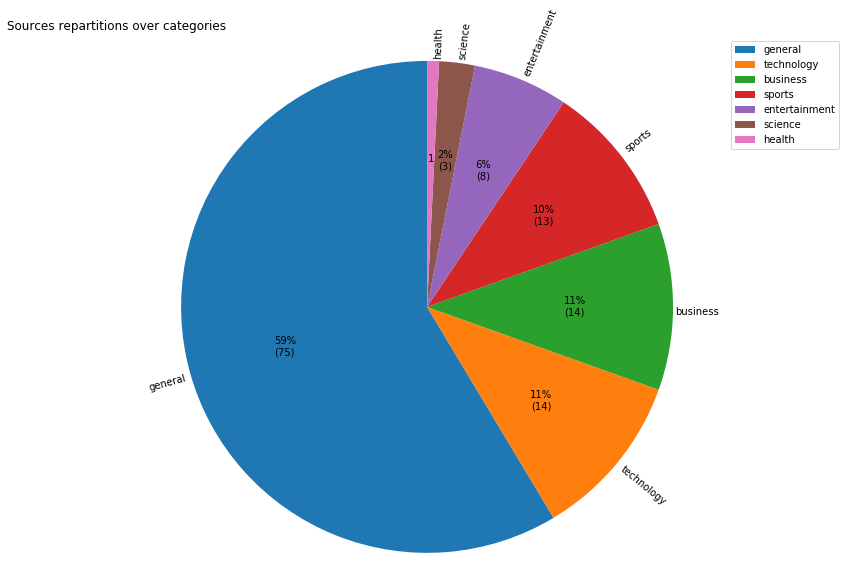

In [57]:
category_vc = df['category'].value_counts()

title = "Sources repartitions over categories"

labels = category_vc.index
sizes = category_vc.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=90, labeldistance=1.01,rotatelabels=True)
ax1.axis('equal')
plt.legend()
plt.title(title, loc = 'left')
plt.show()

From this pie plot we can extract that the majority of newspapers with 75 out of 128 are classified as general which we can suppose means newspapers with no speciality. After that vast majority we have a first group containing around 10% of the newspapers that are technology, business, sport and entertainment (A little bit less for this one with only 6%). And finally 2 last categories with very little number of newspapers that are Science and Health. As our study is about Covid, a special look on the only newspaper considered as health could be interesting.

In [45]:
df[df['category'] == 'health']

,id,name,description,url,category,language,country
72,medical-news-today,Medical News Today,Medical news and health news headlines posted ...,http://www.medicalnewstoday.com,health,en,us


In [46]:
# In order to study the categories later on we save the newspapers id per category
categories = df['category'].unique()
d = {}
for category in categories:
    newspapers = list(df['id'][df['category']==category])
    
    d[category] = newspapers

with open('category_dict.pkl', 'wb') as f:
    pickle.dump(d, f)

Now let's look at language.

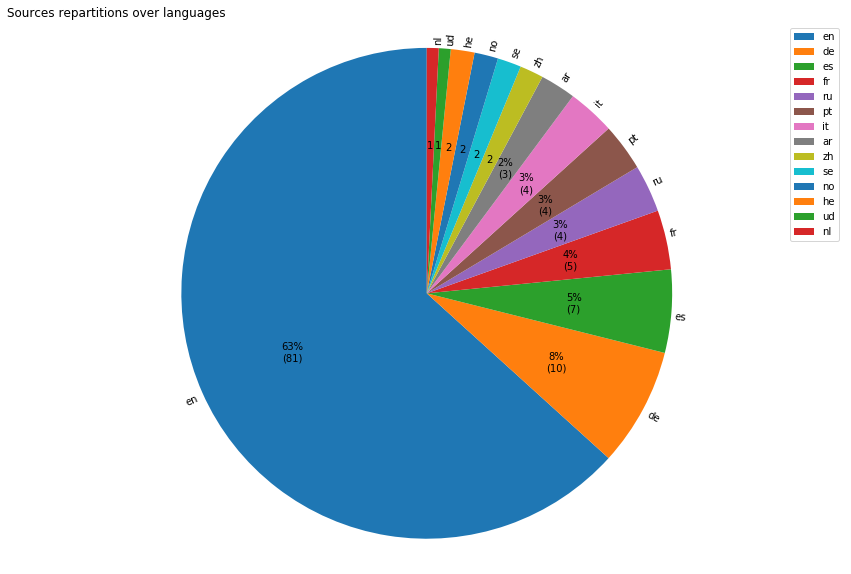

In [58]:
language_vc = df['language'].value_counts()
title = "Sources repartitions over languages"


labels = language_vc.index
sizes = language_vc.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=90, labeldistance=1.01,rotatelabels=True)
ax1.axis('equal')
plt.legend()
plt.title(title, loc = 'left')
plt.show()

Regarding language, while we have wider number of languages, the first one (english) has an even bigger percentage reaching 63% with 81 different newspapers publishing in english. After the obvious first language we would expect spanish to be second as it is widely speaked around the world, however it comes only third after german. After those 3 languages comes a list of 11 languages with only a few papers each.

In [61]:
# In order to study the languages later on we save the newspapers id per language.
languages = df['language'].unique()
d = {}
for language in languages:
    newspapers = list(df['id'][df['language']==language])
    
    d[language] = newspapers

with open('language_dict.pkl', 'wb') as f:
    pickle.dump(d, f)

Now let's move to the last attribute: country.

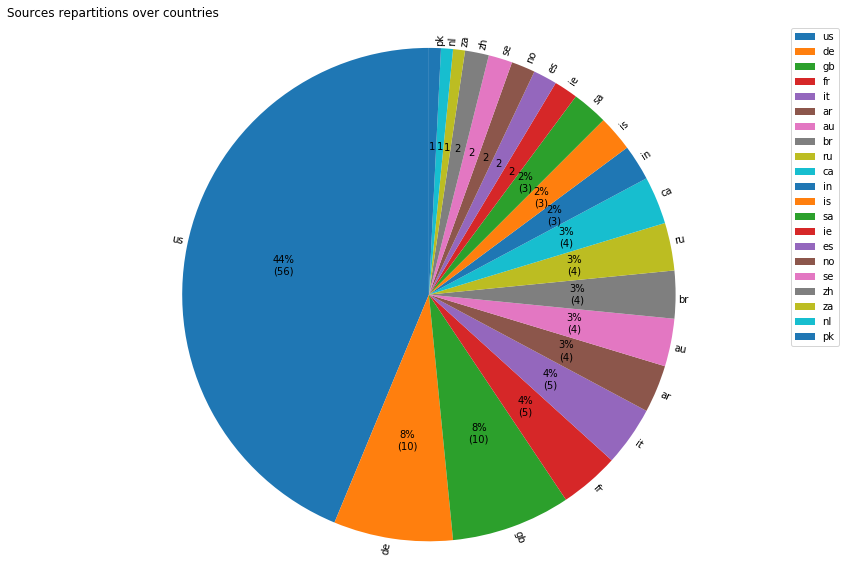

In [62]:
country_vc = df['country'].value_counts()
title = "Sources repartitions over countries"


labels = country_vc.index
sizes = country_vc.values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=90, labeldistance=1.01,rotatelabels=True)
ax1.axis('equal')
plt.legend()
plt.title(title, loc = 'left')
plt.show()

In this last pie chart, we can see that there is a very large number of countries from which the API's collects articles. There is still a big part of it that comes from only one country, the US (56 over 128). After this primary source, there are 2 secondary sources with 10 each in Germany and England and after those two a wide number of others country with only a couple of newspapers each.

In [63]:
# In order to study the countries later on we save the newspapers id per country
countries = df['country'].unique()
d = {}
for country in countries:
    newspapers = list(df['id'][df['country']==country])
    
    d[country] = newspapers

with open('country_dict.pkl', 'wb') as f:
    pickle.dump(d, f)